In [1]:
import seaborn as sns
import matplotlib.transforms as transforms
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
import deepdish as dd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import qgrid
import statsmodels as sm
import scipy
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

C:\Users\aimon\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
Regionsdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

In [3]:
GoodICFiles=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")

In [4]:
Regionsdf=Regionsdf[Regionsdf['R2Walk']>0]
Regionsdf=Regionsdf.query('UAS!="syt6s"')
Regionsdf.loc[Regionsdf['UAS']=="6f",'UAS']='Z6f'

In [5]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames*GAL4+UAS+FR", data=Regionsdf).fit()

In [6]:
aov_table = anova_lm(lin_reg, typ=2)
print(lin_reg.rsquared)
aov_table

0.503281036708429


,sum_sq,df,F,PR(>F)
RegionNames,20.819995,40.0,19.848318,1.148760e-129
GAL4,100.387102,7.0,546.868561,0.000000e+00
UAS,1.618244,4.0,15.427200,1.512429e-12
RegionNames:GAL4,9.499337,280.0,1.293714,9.415757e-04
FR,0.000089,1.0,0.003384,9.536122e-01
Residual,131.906108,5030.0,NaN,NaN


In [7]:
lin_reg = smf.ols(formula="R2Walk ~ GAL4+RegionNames+UAS+FR", data=Regionsdf).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 R2Walk   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     89.65
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:11:15   Log-Likelihood:                 2139.2
No. Observations:                5363   AIC:                            -4172.
Df Residuals:                    5310   BIC:                            -3823.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3768      0.016     23.305      0.000       0.345       0.409
GAL4[T.GMR57C10]        -0.2168      0.017    -13.123      0.000      -0.249      -0.184
GAL4[T.Gad]              0.2077      0.011     18.957      0.000       0.186       0.229
GAL4[T.Nsyb]            -0.1608      0.010    -16.772      0.000      -0.180      -0.142
GAL4[T.TDC]             -0.0756      0.016     -4.802      0.000      -0.106      -0.045
GAL4[T.TH]               0.0064      0.011      0.578      0.563      -0.015       0.028
GAL4[T.Trh]             -0.2916      0.011    -27.551      0.000      -0.312      -0.271
GAL4[T.Vglut]           -0.0205      0.011     -1.885      0.060      -0.042       0.001
RegionNames[T.AME]      -0.0404      0.020     -2.066      0.039      -0.079      -0.002
RegionNames[T.AMMC]      0.0290      0.019      1.494      0.135      -0.009       0.067
RegionNames[T.AOTU]     -0.0762      0.019     -3.921      0.000      -0.114      -0.038
RegionNames[T.ATL]       0.0081      0.019      0.418      0.676      -0.030       0.046
RegionNames[T.AVLP]      0.0055      0.019      0.283      0.777      -0.033       0.044
RegionNames[T.BU]       -0.0397      0.019     -2.047      0.041      -0.078      -0.002
RegionNames[T.CAN]       0.0820      0.019      4.231      0.000       0.044       0.120
RegionNames[T.CRE]      -0.0540      0.019     -2.786      0.005      -0.092      -0.016
RegionNames[T.EB]       -0.0289      0.024     -1.219      0.223      -0.075       0.018
RegionNames[T.EPA]       0.0719      0.019      3.703      0.000       0.034       0.110
RegionNames[T.FB]        0.0046      0.024      0.193      0.847      -0.042       0.051
RegionNames[T.FLA]       0.0631      0.019      3.243      0.001       0.025       0.101
RegionNames[T.GA]       -0.0371      0.019     -1.908      0.056      -0.075       0.001
RegionNames[T.GNG]       0.0405      0.024      1.710      0.087      -0.006       0.087
RegionNames[T.GOR]       0.0757      0.019      3.906      0.000       0.038       0.114
RegionNames[T.IB]        0.0693      0.019      3.583      0.000       0.031       0.107
RegionNames[T.ICL]       0.0388      0.019      2.002      0.045       0.001       0.077
RegionNames[T.IPS]       0.0571      0.019      2.950      0.003       0.019       0.095
RegionNames[T.IVLP]      0.0465      0.019      2.391      0.017       0.008       0.085
RegionNames[T.LAL]       0.0303      0.019      1.563      0.118      -0.008       0.068
RegionNames[T.LH]       -0.1129      0.019     -5.827      0.000      -0.151      -0.075
RegionNames[T.LO]       -0.0202      0.019     -1.042      0.297      -0.058       0.018
RegionNames[T.LOP]      -0.0585      0.019     -3.013      0.003      -0.096      -0.020
RegionNames[T.MBCA]     -0.0647      0.020     -3.309    

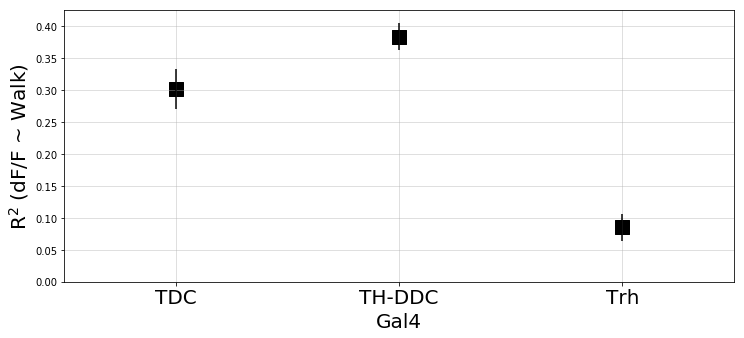

<Figure size 432x288 with 0 Axes>

In [8]:
#fig, ax = plt.subplots(figsize=(12, 5))
#offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
#trans = plt.gca().transData

###################3

err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
coef_df = pd.DataFrame({'coef': lin_reg.params.values[[4,5,6]]+lin_reg.params.values[0],
                        'err': err_series.values[[4,5,6]],
                        'varname': err_series.index.values[[4,5,6]]
                       })


fig, ax = plt.subplots(figsize=(12, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='None', 
             yerr='err', legend=False)

ax.set_ylabel('R$^2$ (dF/F ~ Walk)', fontsize=20)
ax.set_xlabel('Gal4', fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=200, 
           y=coef_df['coef'], color='black')

#ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['TDC','TH-DDC','Trh'], 
                       rotation=0, fontsize=20)
ax.grid(True,alpha=0.5)
plt.show()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\LinearModelRegionsWalkTDCTHTrh.svg')

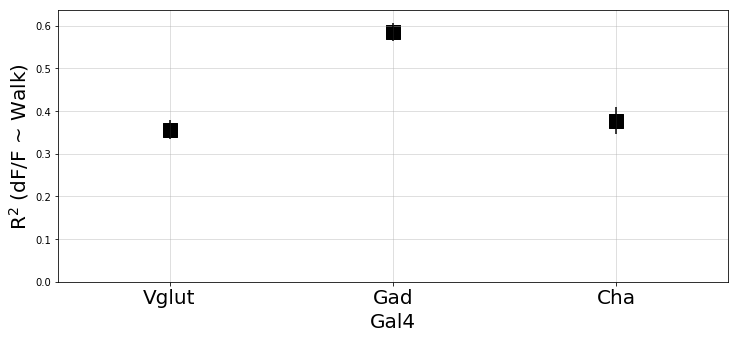

<Figure size 432x288 with 0 Axes>

In [9]:
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
coef_df = pd.DataFrame({'coef': lin_reg.params.values[[7,2]]+lin_reg.params.values[0],
                        'err': err_series.values[[7,2]],
                        'varname': err_series.index.values[[7,2]]
                       })

coef_df=coef_df.append(coef_df.loc[coef_df.index == 1].assign(err=err_series.values[0]).assign(varname='Cha').assign(coef=lin_reg.params.values[0]))

fig, ax = plt.subplots(figsize=(12, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='None', 
             yerr='err', legend=False)

ax.set_ylabel('R$^2$ (dF/F ~ Walk)', fontsize=20)
ax.set_xlabel('Gal4', fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=200, 
           y=coef_df['coef'], color='black')

#ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Vglut','Gad','Cha'], 
                       rotation=0, fontsize=20)
ax.grid(True,alpha=0.5)
plt.show()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\LinearModelRegionsWalkVglutGadCha.svg')

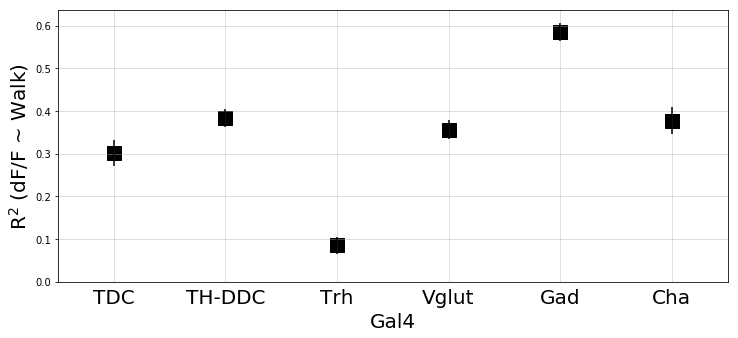

<Figure size 432x288 with 0 Axes>

In [10]:
#fig, ax = plt.subplots(figsize=(12, 5))
#offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
#trans = plt.gca().transData

###################3

err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
coef_df = pd.DataFrame({'coef': lin_reg.params.values[[4,5,6,7,2]]+lin_reg.params.values[0],
                        'err': err_series.values[[4,5,6,7,2]],
                        'varname': err_series.index.values[[4,5,6,7,2]]
                       })

coef_df=coef_df.append(coef_df.loc[coef_df.index == 1].assign(err=err_series.values[0]).assign(varname='Cha').assign(coef=lin_reg.params.values[0]))

fig, ax = plt.subplots(figsize=(12, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='None', 
             yerr='err', legend=False)

ax.set_ylabel('R$^2$ (dF/F ~ Walk)', fontsize=20)
ax.set_xlabel('Gal4', fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=200, 
           y=coef_df['coef'], color='black')

ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['TDC','TH-DDC','Trh','Vglut','Gad','Cha'], 
                       rotation=0, fontsize=20)
ax.grid(True,alpha=0.5)
plt.show()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\LinearModelRegionsWalkAll.svg')

In [11]:
Regionsdf[Regionsdf['GAL4']=='Cha']['UAS'].unique()

array(['Z6f', '6m'], dtype=object)

In [12]:
Regionsdf[Regionsdf['GAL4']=='Gad']['UAS'].unique()

array(['6m'], dtype=object)

In [13]:
Regionsdf[Regionsdf['GAL4']=='Vglut']['UAS'].unique()

array(['6m'], dtype=object)

In [14]:
Regionsdf[Regionsdf['GAL4']=='TH']['UAS'].unique()

array(['6m', 'Z6f'], dtype=object)

In [15]:
Regionsdf[Regionsdf['GAL4']=='Trh']['UAS'].unique()

array(['Z6f', '6m', '6s'], dtype=object)

In [16]:
Regionsdf[Regionsdf['GAL4']=='TDC']['UAS'].unique()

array(['6s'], dtype=object)

In [17]:
Regionsdf[Regionsdf['GAL4']=='Cha']['FlyID'].unique()

array([48, 50, 51, 52, 53], dtype=int64)

In [18]:
Regionsdf[Regionsdf['GAL4']=='Cha']['expID'].unique()

array(['100160', 'B1073', 'B1075', 'B1080', 'B1090'], dtype=object)

In [19]:
Regionsdf[Regionsdf['GAL4']=='Gad']['FlyID'].unique()

array([61, 62, 63, 65, 66], dtype=int64)

In [20]:
Regionsdf[Regionsdf['GAL4']=='Vglut']['FlyID'].unique()

array([56, 57, 58, 59, 60], dtype=int64)

In [21]:
Regionsdf[Regionsdf['GAL4']=='TH']['FlyID'].unique()

array([72, 73, 76, 77, 78, 79, 80, 81, 85], dtype=int64)

In [22]:
Regionsdf[Regionsdf['GAL4']=='TDC']['FlyID'].unique()

array([108, 109, 110, 111, 112, 121, 126], dtype=int64)

In [23]:
Regionsdf[Regionsdf['GAL4']=='Trh']['FlyID'].unique()

array([ 91,  93,  94,  95,  96, 102], dtype=int64)

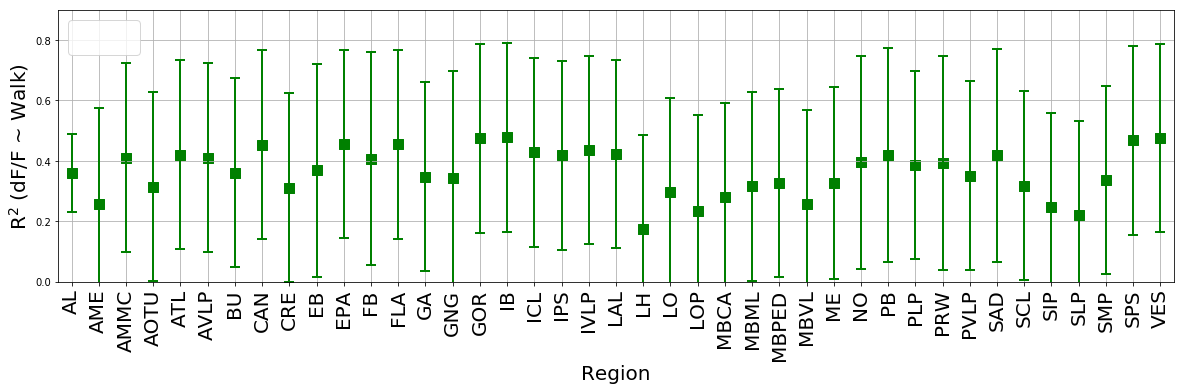

In [24]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='Cha']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.ylim([0,0.9])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\R2ChaWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

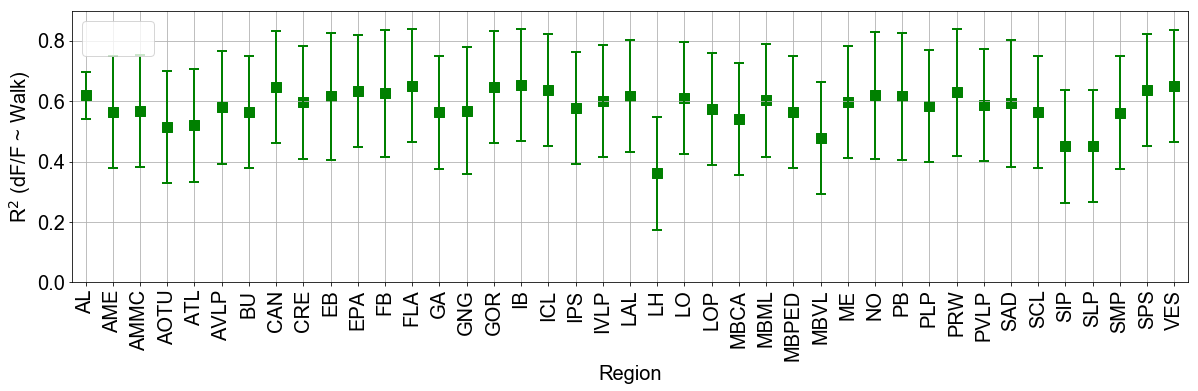

In [25]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='Gad']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.ylim([0,0.9])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\R2GadWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

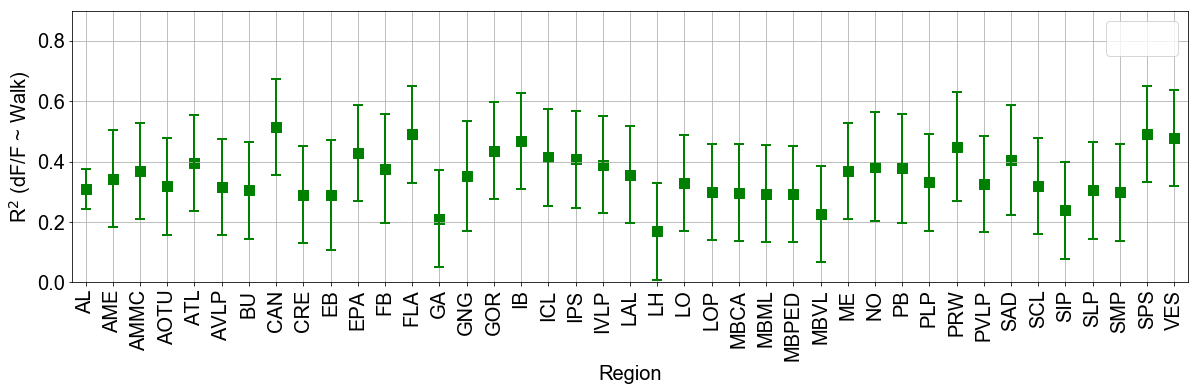

In [26]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='Vglut']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.ylim([0,0.9])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\R2VglutWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

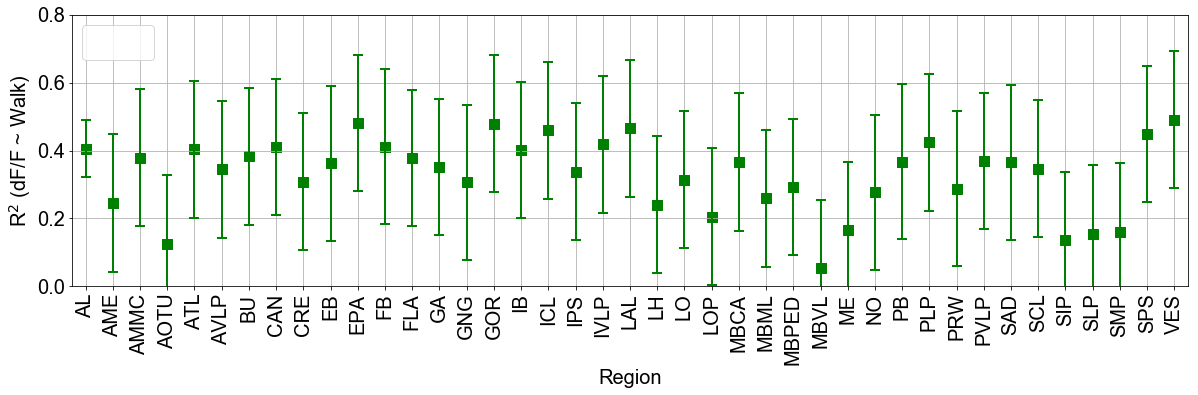

In [27]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='TH']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.ylim([0,0.8])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\R2THWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

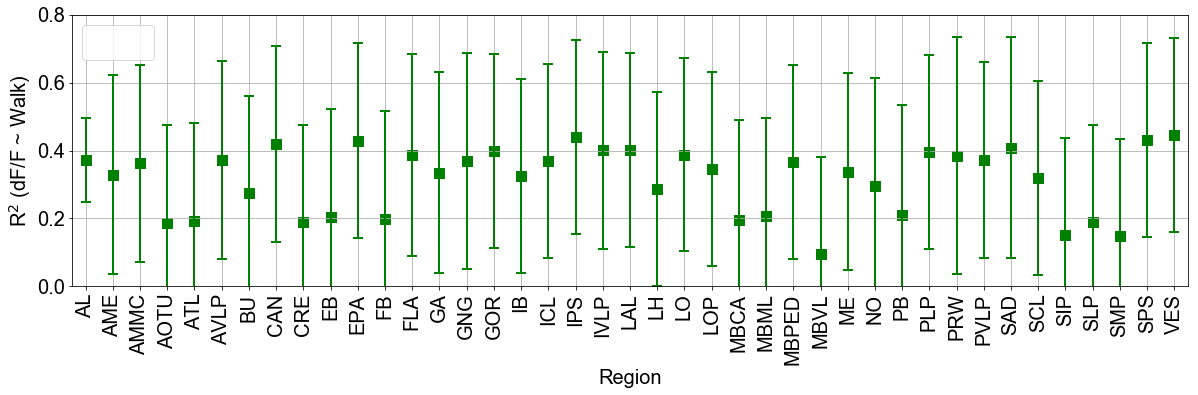

In [28]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='TDC']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.ylim([0,0.8])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\R2TDCWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

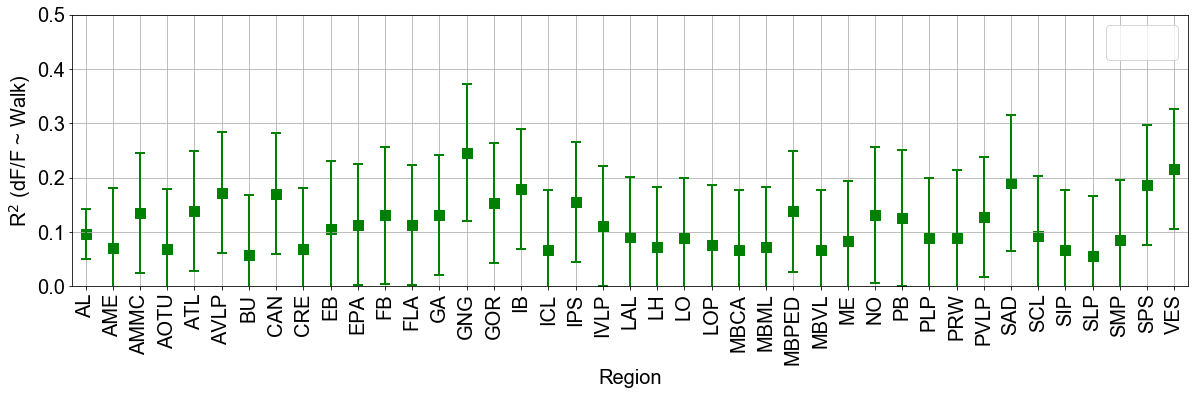

In [29]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='Trh']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.ylim([0,0.5])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\R2TrhWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

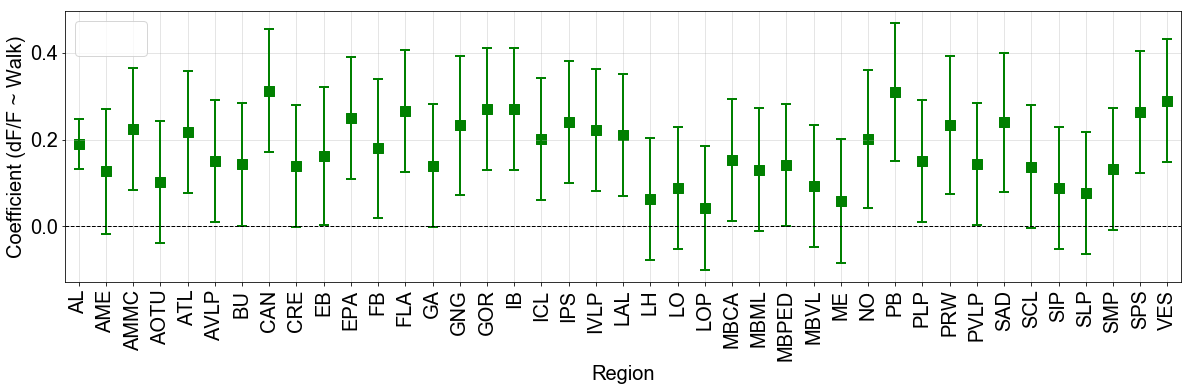

In [30]:
lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='Cha']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.4)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefChaWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

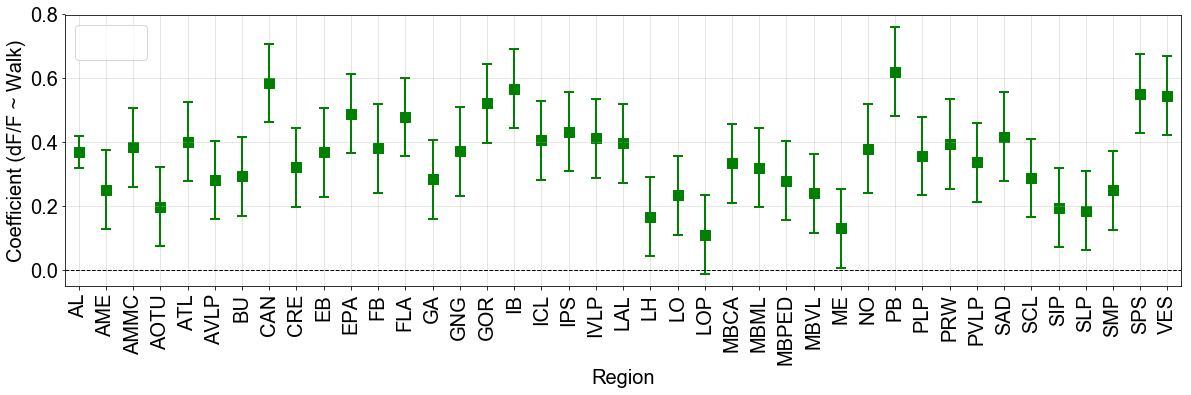

In [31]:
lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='Gad']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.4)

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefGadWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

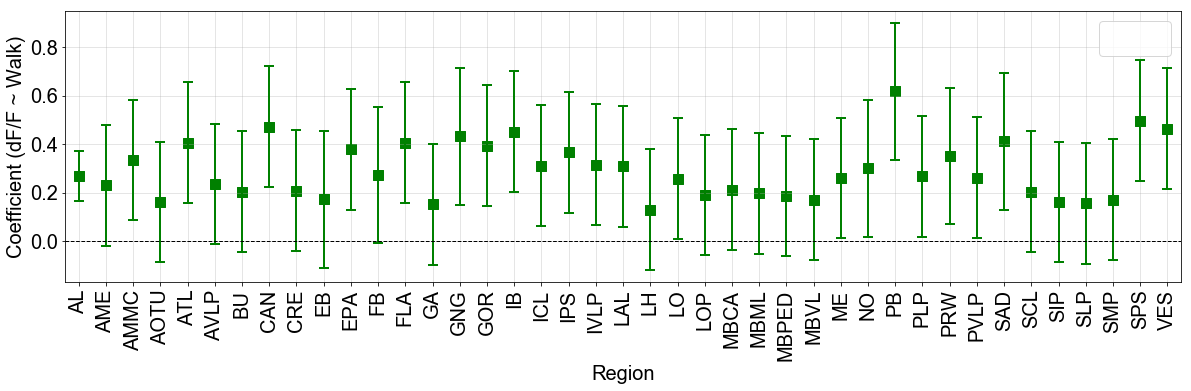

In [32]:
lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='Vglut']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.4)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefVglutWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

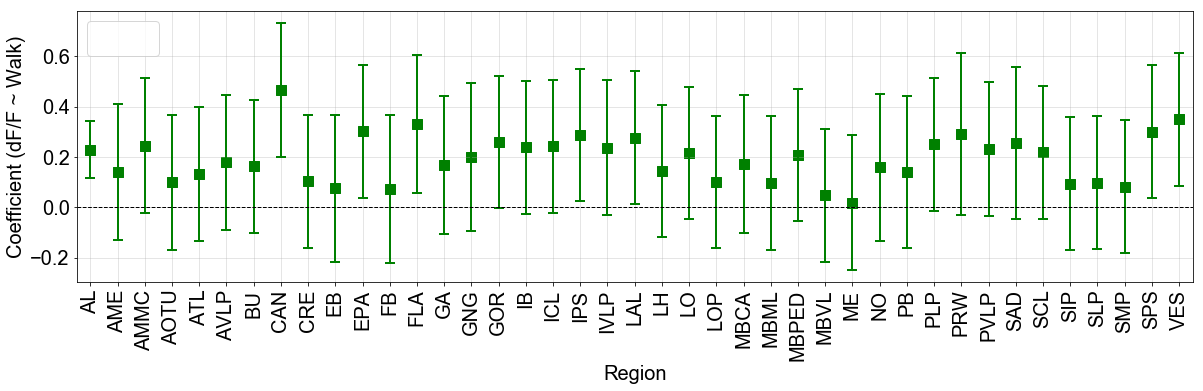

In [33]:
lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf[Regionsdf['GAL4']=='TDC']).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.4)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefTDCWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

In [34]:
Regionsdf.query('GAL4=="Trh"')['FlyID'].unique()

array([ 91,  93,  94,  95,  96, 102], dtype=int64)

In [35]:
lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Trh"')).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CoefWalk   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     17.14
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           3.23e-84
Time:                        11:11:36   Log-Likelihood:                 725.90
No. Observations:                 825   AIC:                            -1366.
Df Residuals:                     782   BIC:                            -1163.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1124      0.022      5.075      0.000       0.069       0.156
RegionNames[T.AME]      -0.0212      0.031     -0.681      0.496      -0.082       0.040
RegionNames[T.AMMC]      0.0628      0.031      2.021      0.044       0.002       0.124
RegionNames[T.AOTU]     -0.0676      0.031     -2.175      0.030      -0.129      -0.007
RegionNames[T.ATL]       0.0664      0.031      2.135      0.033       0.005       0.127
RegionNames[T.AVLP]     -0.3163      0.031    -10.175      0.000      -0.377      -0.255
RegionNames[T.BU]       -0.0446      0.031     -1.435      0.152      -0.106       0.016
RegionNames[T.CAN]       0.1131      0.031      3.639      0.000       0.052       0.174
RegionNames[T.CRE]      -0.0389      0.031     -1.252      0.211      -0.100       0.022
RegionNames[T.EB]       -0.0009      0.038     -0.024      0.981      -0.076       0.074
RegionNames[T.EPA]       0.0002      0.031      0.005      0.996      -0.061       0.061
RegionNames[T.FB]     5.834e-05      0.038      0.002      0.999      -0.075       0.075
RegionNames[T.FLA]       0.0443      0.031      1.426      0.154      -0.017       0.105
RegionNames[T.GA]       -0.1397      0.031     -4.495      0.000      -0.201      -0.079
RegionNames[T.GNG]       0.1278      0.038      3.356      0.001       0.053       0.203
RegionNames[T.GOR]       0.0150      0.031      0.482      0.630      -0.046       0.076
RegionNames[T.IB]        0.1109      0.031      3.566      0.000       0.050       0.172
RegionNames[T.ICL]      -0.1116      0.031     -3.589      0.000      -0.173      -0.051
RegionNames[T.IPS]       0.0624      0.031      2.008      0.045       0.001       0.123
RegionNames[T.IVLP]      0.0225      0.031      0.723      0.470      -0.039       0.083
RegionNames[T.LAL]      -0.0151      0.031     -0.487      0.626      -0.076       0.046
RegionNames[T.LH]       -0.1392      0.031     -4.478      0.000      -0.200      -0.078
RegionNames[T.LO]       -0.0385      0.031     -1.240      0.215      -0.100       0.022
RegionNames[T.LOP]      -0.0677      0.031     -2.178      0.030      -0.129      -0.007
RegionNames[T.MBCA]     -0.0927      0.031     -2.982      0.003      -0.154      -0.032
RegionNames[T.MBML]     -0.0370      0.031     -1.190      0.235      -0.098       0.024
RegionNames[T.MBPED]    -0.1500      0.031     -4.826      0.000      -0.211      -0.089
RegionNames[T.MBVL]     -0.0377      0.031     -1.214      0.225      -0.099       0.023
RegionNames[T.ME]       -0.0541      0.031     -1.742      0.082      -0.115       0.007
RegionNames[T.NO]        0.0373      0.038      0.979      0.328      -0.037       0.112
RegionNames[T.PB]       -0.0074      0.038     -0.196      0.845      -0.082       0.067
RegionNames[T.PLP]      -0.1517      0.031     -4.881    

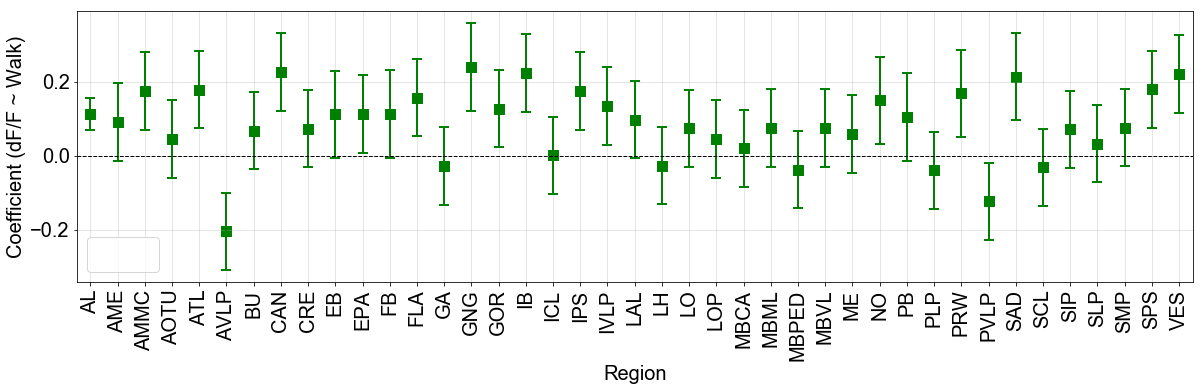

In [36]:
lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Trh"')).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(Regionsdf['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.4)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefTrhWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

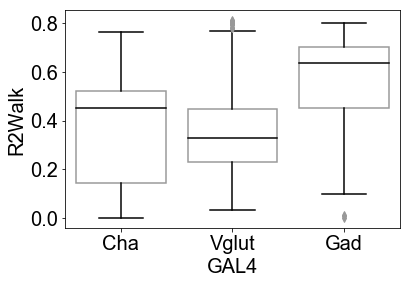

In [37]:
df=Regionsdf.query('GAL4=="Cha" or GAL4=="Vglut" or GAL4=="Gad"')
ax=sns.boxplot(x='GAL4',y='R2Walk',data=df,color='w')
for j in range(18):
    ax.lines[j].set_color('black')

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\BoxR2RegionsWalkGal4.svg')


In [38]:
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\BroadGAL4PairR2_pvaluesperfly.txt', 'w') as f:

        print('Cha vs Gad')
        f.write(':') 
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='Cha'].groupby('FlyID').mean()['R2Walk'], df.loc[df['GAL4']=='Gad'].groupby('FlyID').mean()['R2Walk']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='Cha'].groupby('FlyID').mean()['R2Walk'], df.loc[df['GAL4']=='Gad'].groupby('FlyID').mean()['R2Walk']).pvalue*3))

        print('Cha vs Vglut')
        f.write(':') 
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='Cha'].groupby('FlyID').mean()['R2Walk'], df.loc[df['GAL4']=='Vglut'].groupby('FlyID').mean()['R2Walk']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='Cha'].groupby('FlyID').mean()['R2Walk'],df.loc[df['GAL4']=='Vglut'].groupby('FlyID').mean()['R2Walk']).pvalue*3))

        print('Gad vs Vglut')
        f.write(':') 
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='Gad'].groupby('FlyID').mean()['R2Walk'], df.loc[df['GAL4']=='Vglut'].groupby('FlyID').mean()['R2Walk']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='Gad'].groupby('FlyID').mean()['R2Walk'], df.loc[df['GAL4']=='Vglut'].groupby('FlyID').mean()['R2Walk']).pvalue*3))


Cha vs Gad
0.1420394139
Cha vs Vglut
1.0141549710
Gad vs Vglut
0.0901542089


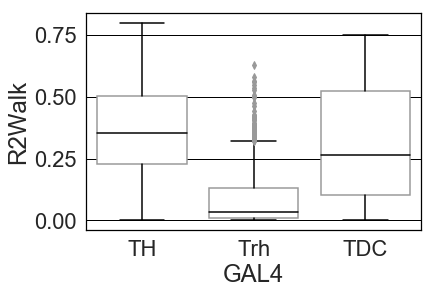

In [64]:
df=Regionsdf.query('GAL4=="TH" or GAL4=="TDC" or GAL4=="Trh"')
ax=sns.boxplot(x='GAL4',y='R2Walk',data=df,color='w')
for j in range(18):
    ax.lines[j].set_color('black')

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\BoxR2RegionsWalkGal4Amines.svg')


In [68]:
print('TH vs Trh')
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='TH'].groupby('FlyID').mean()['R2Walk'], df.loc[df['GAL4']=='Trh'].groupby('FlyID').mean()['R2Walk']).pvalue*3))

print('TH vs TDC')
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='TH'].groupby('FlyID').mean()['R2Walk'],df.loc[df['GAL4']=='TDC'].groupby('FlyID').mean()['R2Walk']).pvalue*3))

print('Trh vs TDC')
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df.loc[df['GAL4']=='Trh'].groupby('FlyID').mean()['R2Walk'], df.loc[df['GAL4']=='TDC'].groupby('FlyID').mean()['R2Walk']).pvalue*3))


TH vs Trh
0.0323344001
TH vs TDC
1.1262352783
Trh vs TDC
0.0402136961


In [67]:
dfa=Regionsdf.query('GAL4=="TH"')
dfa.loc[dfa['R2Walk']>0]['expID'].unique()

array(['107', '100142', '100455', '100597', '100621', 'B370', 'B373',
       '46', 'B1054'], dtype=object)

In [41]:
df=Regionsdf.query('GAL4=="Cha"')
df2=df[['CoefWalk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianCoefChaWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianCoefChaWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'CoefWalk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListCoefFiles.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure2/MedianCoefChaWalk.txt


In [42]:
df=Regionsdf.query('GAL4=="Cha"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianR2ChaWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianR2ChaWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure2/MedianR2ChaWalk.txt


In [43]:
df=Regionsdf.query('GAL4=="Vglut"')
df2=df[['CoefWalk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianCoefVglutWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianCoefVglutWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'CoefWalk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListCoefFiles.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure2/MedianCoefVglutWalk.txt


In [44]:
df=Regionsdf.query('GAL4=="Vglut"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianR2VglutWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianR2VglutWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure2/MedianR2VglutWalk.txt


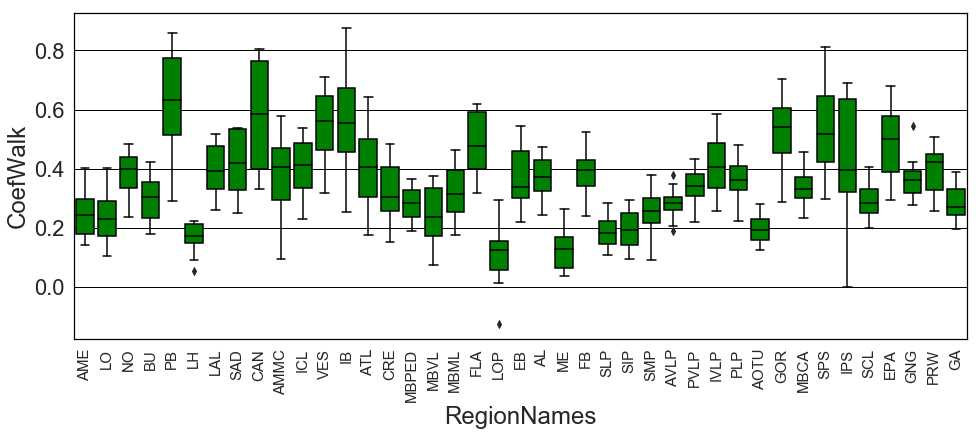

In [45]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Regionsdf.query('GAL4=="Gad"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='CoefWalk',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\CoefRegionsAllWalkGad.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [46]:
df=Regionsdf.query('GAL4=="Gad"')
df2=df[['CoefWalk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianCoefGadWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianCoefGadWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'CoefWalk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListCoefFiles.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure2/MedianCoefGadWalk.txt


In [47]:
df=Regionsdf.query('GAL4=="Gad"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianR2GadWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\MedianR2GadWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure2/MedianR2GadWalk.txt


In [48]:
df=Regionsdf.query('GAL4=="Trh"')
df2=df[['CoefWalk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianCoefTrhWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianCoefTrhWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'CoefWalk'])))        
        f.write('\n')
 
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListCoefFiles.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure3/MedianCoefTrhWalk.txt


In [49]:
df=Regionsdf.query('GAL4=="Trh"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianR2TrhWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianR2TrhWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
 
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure3/MedianR2TrhWalk.txt


In [50]:
df=Regionsdf.query('GAL4=="TDC"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianR2TDCWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianR2TDCWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure3/MedianR2TDCWalk.txt


In [51]:
df=Regionsdf.query('GAL4=="TDC"')
df2=df[['CoefWalk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianCoefTDCWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianCoefTDCWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'CoefWalk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListCoefFiles.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure3/MedianCoefTDCWalk.txt


In [52]:
df=Regionsdf.query('GAL4=="TH"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianR2THWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianR2THWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure3/MedianR2THWalk.txt


In [53]:
df=Regionsdf.query('GAL4=="TH"')
df2=df[['CoefWalk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianCoefTHWalk.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\MedianCoefTHWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'CoefWalk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListCoefFiles.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure3/MedianCoefTHWalk.txt


In [54]:
# Old code

In [55]:
df=Regionsdf.query('GAL4=="TDC"')
df2=df[['CoefWalk','RegionNames','FlyID']]
df2=df2.dropna()
L=len(df2.RegionNames.unique())
df=df2
pval=np.zeros(41)

i=0
for compid in df.RegionNames.unique():
    df2=df.loc[df['RegionNames']==compid]
    pval[i]=scipy.stats.wilcoxon(df2.groupby('FlyID').mean()['CoefWalk']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefTDCWalktoZero.txt', 'w') as f:
    for compid in df.RegionNames.unique():
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        if pvalcorr[1][i]<0.05:
            print(compid)
            print(pvalcorr[1][i])
        i=i+1
        
        


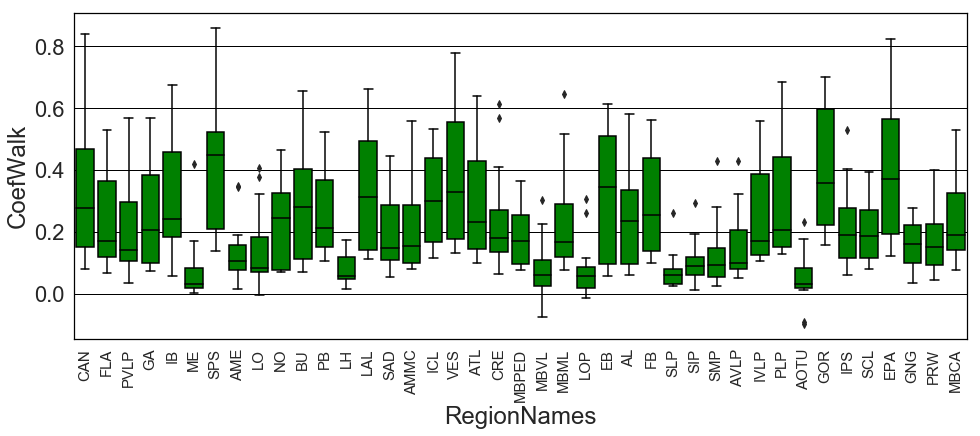

In [56]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Regionsdf.query('GAL4=="TH"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='CoefWalk',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefRegionsAllWalkTH.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

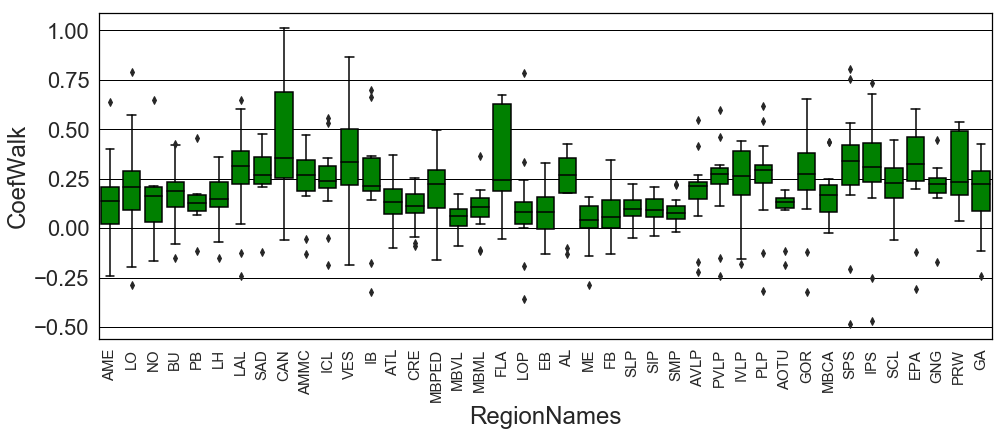

In [57]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Regionsdf.query('GAL4=="TDC"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='CoefWalk',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefRegionsAllWalkTDC.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

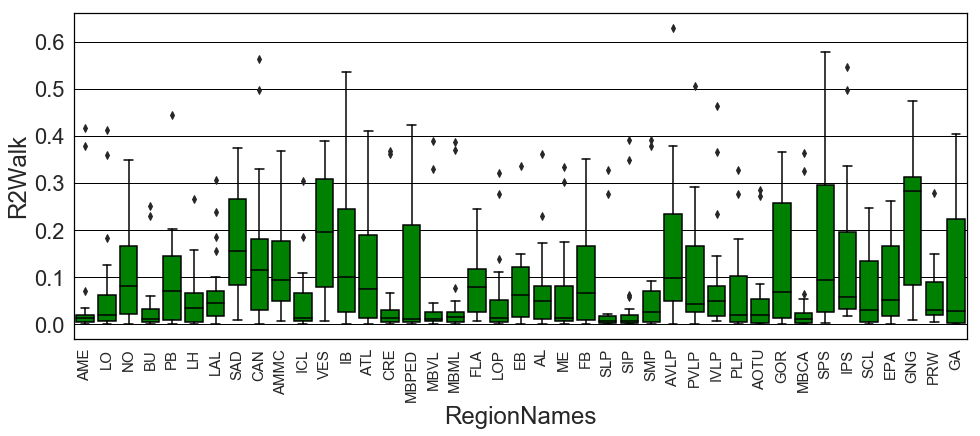

In [58]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Regionsdf.query('GAL4=="Trh"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='R2Walk',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\R2RegionsAllWalkTrh.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

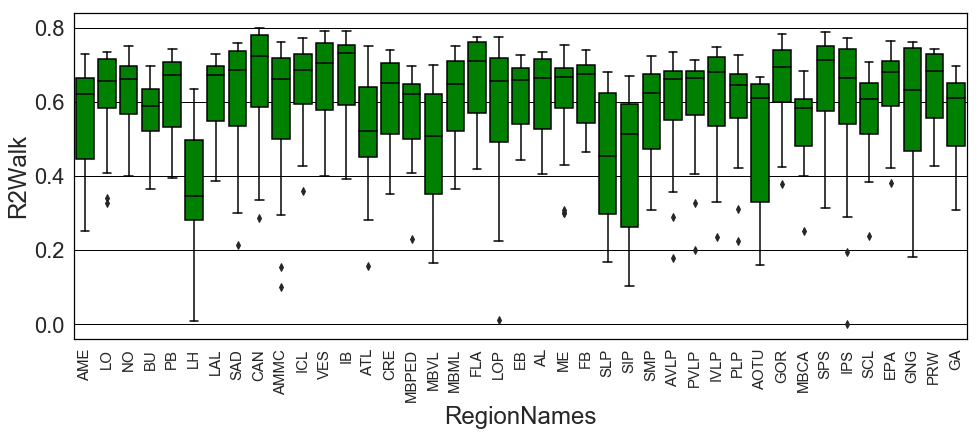

In [59]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Regionsdf.query('GAL4=="Gad"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='R2Walk',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\R2RegionsAllWalkGad.svg')
plt.show()

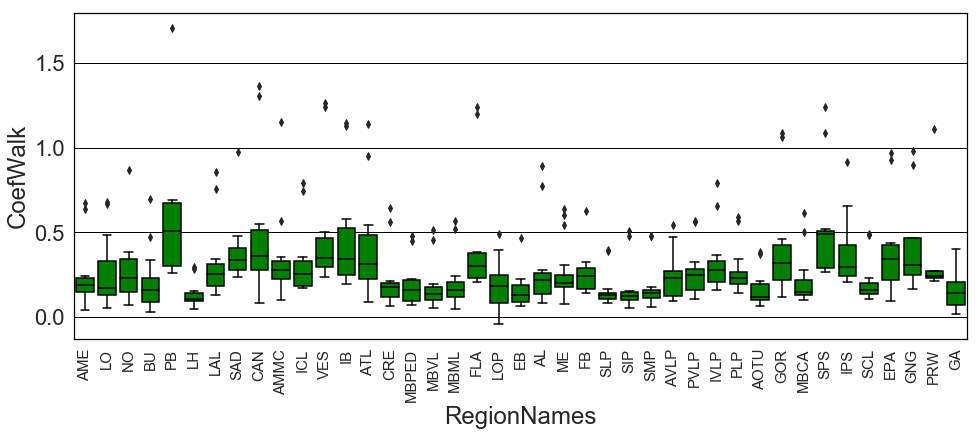

In [60]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Regionsdf.query('GAL4=="Vglut"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='CoefWalk',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\CoefRegionsAllWalkVglut.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

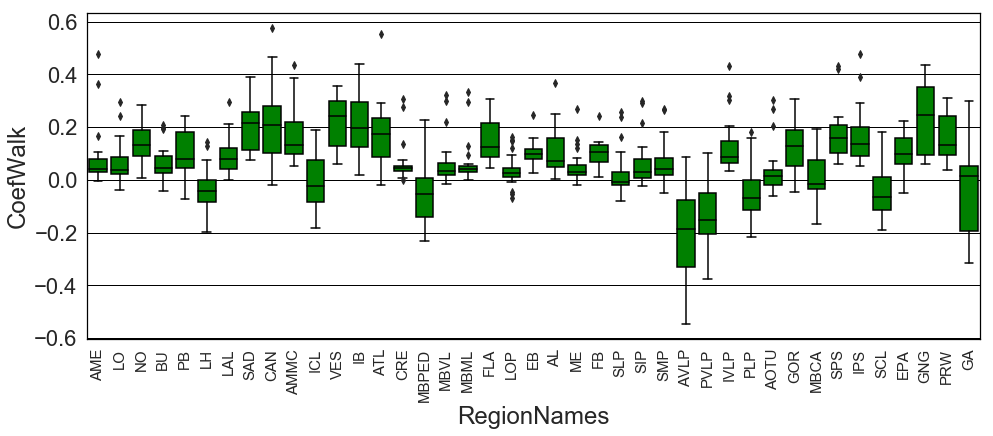

In [61]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Regionsdf.query('GAL4=="Trh"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='CoefWalk',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefRegionsAllWalkTrh.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

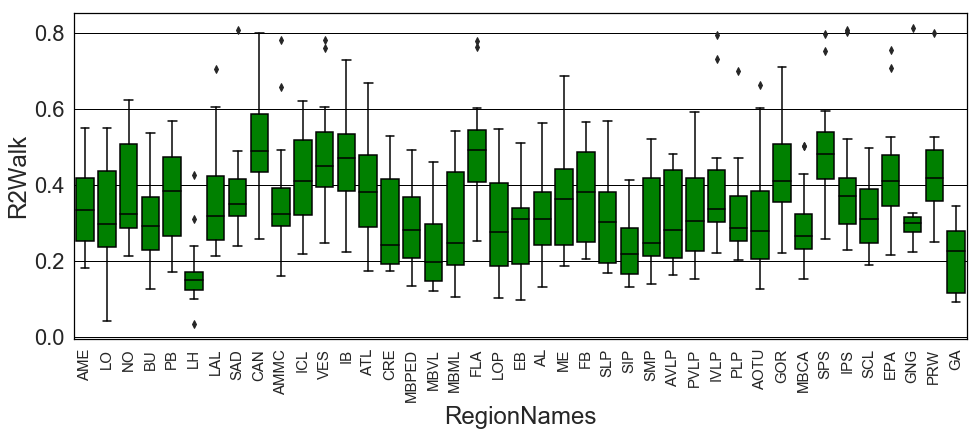

In [62]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Regionsdf.query('GAL4=="Vglut"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='R2Walk',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure2\R2RegionsAllWalkVglut.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()